In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_feather('../data/h201.feather')
feats = pd.read_csv('../data/Health Status Variables.csv')

In [4]:
df = df.loc[(df['AGELAST'] <= 17) & (df['AGELAST'] >= 5), :]
df = df.loc[(df['UNHAP42'] >= 0) & (df['UNHAP42'] <= 4), :]

In [5]:
df['UNHAP42'] = df['UNHAP42'].map({0:0, 1:1, 2:1, 3:1, 4:1})

In [6]:
#children with special health care needs screener variables
special_needs = [col for col in feats['VARIABLE'][30:45]]

# columbia impairment scale
impairment = [col for col in feats['VARIABLE'][45:58]]

#Consumer Assessment of Healthcare Providers and Systems (CHAP)
chap = [col for col in feats['VARIABLE'][58:72]]

#child BMI + Dr. Advise about exercise
bmi = ['CHBMIX42', 'WHNPHY42']

#Other identifiers: sex, race, family_income, 
other = ['SEX', 'RACEV2X', 'FAMINC17']

In [7]:
features = [col for col in feats['VARIABLE'][30:97]]
for col in other:
    features.append(col)
features.append('AGELAST')

In [8]:
df = df[features]

## Columbia Impairment Scale EDA 

In [9]:
#creating dictionary of unhap42-means per column in impairment (excluding UNHAP42) 
unhap_means = {}
for col in impairment:
    if col != 'UNHAP42':
        means = df.groupby(col)['UNHAP42'].mean()[0:4]
        unhap_means[col] = [x for x in means]

In [10]:
unhap = pd.DataFrame(unhap_means)
unhap.head()

,MOMPRO42,DADPRO42,SCHLBH42,HAVFUN42,ADUPRO42,NERVAF42,SIBPRO42,KIDPRO42,SPRPRO42,SCHPRO42,HOMEBH42,TRBLE42
0,0.151277,0.147545,0.185625,0.208233,0.200619,0.111282,0.119160,0.169906,0.192582,0.169677,0.123271,0.179082
1,0.564721,0.552511,0.561205,0.824104,0.658590,0.459413,0.401152,0.618440,0.501873,0.510981,0.521195,0.541667
2,0.637441,0.593583,0.618911,0.837500,0.728571,0.656911,0.530691,0.700617,0.584718,0.568282,0.628070,0.660494
3,0.765217,0.754098,0.775701,0.923077,0.859649,0.790541,0.702564,0.890411,0.740000,0.718310,0.798319,0.824176
4,0.796875,0.739496,0.768116,0.777778,0.814815,0.829545,0.682243,0.615385,0.700000,0.790000,0.850746,0.807692


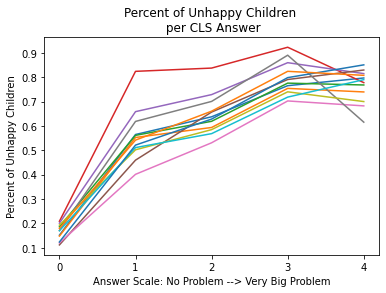

In [189]:
#Each line represents a different question in the CLS questionnaire
for col in unhap:
    plt.plot(unhap[col])
plt.title('Percent of Unhappy Children \n per CLS Answer')
plt.xticks([0,1,2,3,4])
plt.xlabel('Answer Scale: No Problem --> Very Big Problem')
plt.ylabel('Percent of Unhappy Children')
plt.savefig('figs/cls_questions');

## CHAP EDA

In [12]:
how_oftens = []
for i in chap:
    if len(df[i].value_counts()) == 6:
        how_oftens.append(i)

In [13]:
how_oftens_means = {}
for col in how_oftens:
        means = df.groupby(col)['UNHAP42'].mean()[0:4]
        how_oftens_means[col] = [x for x in means]
how_oftens_df = pd.DataFrame(how_oftens_means)

s = pd.Series([1,2,3,4])
how_oftens_df.set_index(s, inplace=True)

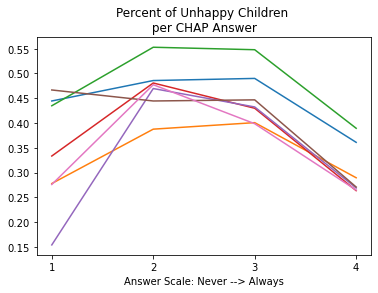

In [190]:
#each line represents a question in the CHAP questionnaire
for col in how_oftens_means:
    plt.plot(how_oftens_df[col])
plt.xticks([1,2,3,4])
plt.xlabel('Answer Scale: Never --> Always')
plt.title('Percent of Unhappy Children \n per CHAP Answer ')
plt.savefig('figs/chap_questions');

In [192]:
how_oftens

['CHILWW42',
 'CHRTWW42',
 'CHENEC42',
 'CHLIST42',
 'CHEXPL42',
 'CHRESP42',
 'CHPRTM42']

## Race EDA 

In [16]:
df.groupby('RACEV2X')['UNHAP42'].mean()

RACEV2X
1.0     0.271014
2.0     0.242922
3.0     0.277778
4.0     0.152174
5.0     0.174603
6.0     0.090909
10.0    0.168831
12.0    0.349490
Name: UNHAP42, dtype: float64

In [17]:
race_hap_dict = {
    'Race' : ['White', 'Black', 'Amer. Indian / Alaska Native',
             'Asian Indian', 'Chinese', 'Filipino', 'Oth Asian/Natv. Hawaiian/Pacfc Isl',
             'Multiple Races'],
    'Hap' : [avg for avg in df.groupby('RACEV2X')['UNHAP42'].mean()]
}

In [18]:
race_hap_df = pd.DataFrame(race_hap_dict)
race_hap_df.head()

,Race,Hap
0,White,0.271014
1,Black,0.242922
2,Amer. Indian / Alaska Native,0.277778
3,Asian Indian,0.152174
4,Chinese,0.174603


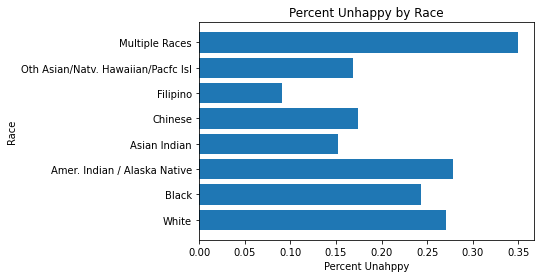

In [191]:
plt.barh(race_hap_df['Race'], race_hap_df['Hap'])
plt.title('Percent Unhappy by Race')
plt.xlabel('Percent Unahppy')
plt.ylabel('Race')
plt.savefig('figs/race');

## Fam-Inc EDA

In [20]:
df['FAMINC17'].describe()

count      5920.000000
mean      67863.578378
std       66352.765270
min       -7621.000000
25%       21000.000000
50%       48015.000000
75%       94874.250000
max      604068.000000
Name: FAMINC17, dtype: float64

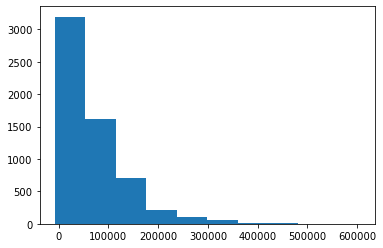

In [176]:
plt.hist(df['FAMINC17']);

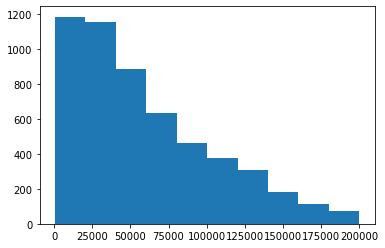

In [22]:
under200 = df.loc[(df['FAMINC17'] <= 200_000) & (df['FAMINC17'] > 0) , :]
plt.hist(under200['FAMINC17']);

In [23]:
under200['FAMINC17'].describe()

count      5367.000000
mean      59730.588970
std       45382.335843
min         500.000000
25%       23000.000000
50%       47445.000000
75%       86780.000000
max      200000.000000
Name: FAMINC17, dtype: float64

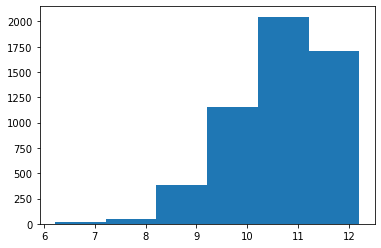

In [24]:
logged = [np.log(inc) for inc in under200['FAMINC17']]
plt.hist(logged, bins=6);

In [25]:
low = [i for i in range(0, 50_000)]
medium = [i for i in range(50_000, 100_000)]
high = [i for i in range(100_000, 200_001)]

inc_maps = []
for x in under200['FAMINC17']:
    if round(x) in low:
        inc_maps.append(0)
    if round(x) in medium:
        inc_maps.append(1)
    if round(x) in high:
        inc_maps.append(2)

In [26]:
under200['INCMAPS'] = inc_maps

<ipython-input-26-926cb0ae7609>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  under200['INCMAPS'] = inc_maps


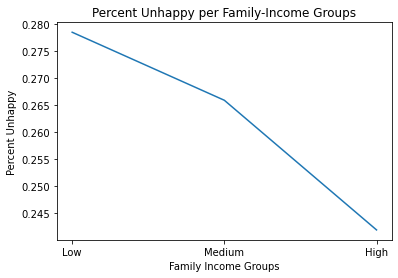

In [179]:
inc_hap = under200.groupby('INCMAPS')['UNHAP42'].mean()
plt.plot(["Low", 'Medium', 'High'], inc_hap)
plt.title('Percent Unhappy per Family-Income Groups')
plt.xlabel('Family Income Groups')
plt.ylabel('Percent Unhappy')
plt.savefig('figs/fam_income_groups');

## Child BMI EDA 

In [28]:
df['CHBMIX42'].describe()

count    5920.000000
mean       13.783581
std        13.976404
min        -9.000000
25%        -1.000000
50%        17.900000
75%        22.100000
max       302.600000
Name: CHBMIX42, dtype: float64

count    4358.000000
mean       21.031941
std         6.034172
min         1.200000
25%        17.000000
50%        20.000000
75%        23.775000
max        56.900000
Name: CHBMIX42, dtype: float64


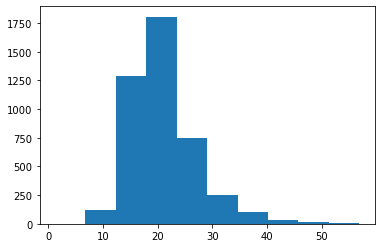

In [29]:
bmi = df.loc[(df['CHBMIX42'] > 0) & (df['CHBMIX42'] < 100),  :]
print(bmi['CHBMIX42'].describe())
plt.hist(bmi['CHBMIX42']);

In [30]:
#found these ranges on google
underweight = [i for i in range(0, 18)]
healthy = [i for i in range(18, 25)]
overweight = [i for i in range(25, 100)]

In [31]:
#mapping healthy children as 0, underweight as 1, overweight as 2
bmi_maps = []
for w in bmi['CHBMIX42']:
    if round(w) in healthy:
        bmi_maps.append(0)
    if round(w) in underweight:
        bmi_maps.append(1)
    if round(w) in overweight:
        bmi_maps.append(2)

In [32]:
bmi['BMIGROUPS'] = bmi_maps

<ipython-input-32-31bc02ac0ef7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bmi['BMIGROUPS'] = bmi_maps


In [33]:
bmi.groupby('BMIGROUPS')['UNHAP42'].mean()

BMIGROUPS
0    0.274353
1    0.273951
2    0.291753
Name: UNHAP42, dtype: float64

In [34]:
male_bmi = bmi.loc[bmi['SEX'] == 1, :]
female_bmi = bmi.loc[bmi['SEX'] == 2, :]

In [35]:
m_bmi_groups = male_bmi.groupby('BMIGROUPS')['UNHAP42'].mean()
f_bmi_groups = female_bmi.groupby('BMIGROUPS')['UNHAP42'].mean()

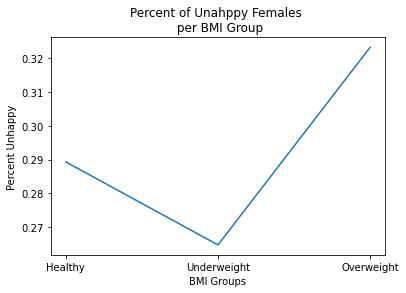

In [182]:
plt.plot(['Healthy', 'Underweight', 'Overweight'], [x for x in f_bmi_groups]);
plt.title('Percent of Unahppy Females \n per BMI Group')
plt.ylabel('Percent Unhappy')
plt.xlabel('BMI Groups')
plt.savefig('figs/female_bmi');

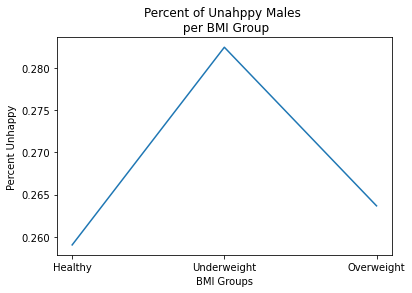

In [183]:
plt.plot(['Healthy', 'Underweight', 'Overweight'], [x for x in m_bmi_groups]);
plt.title('Percent of Unahppy Males \n per BMI Group')
plt.ylabel('Percent Unhappy')
plt.xlabel('BMI Groups')
plt.savefig('figs/male_bmi');

## Age EDA 

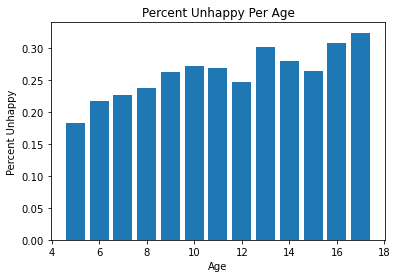

In [184]:
unhap_age = [x for x in df.groupby('AGELAST')['UNHAP42'].mean()]
plt.bar([x for x in range(5, 18)], unhap_age)
plt.title('Percent Unhappy Per Age')
plt.xlabel('Age')
plt.ylabel('Percent Unhappy')
plt.savefig('figs/per_age');

## Back to BMI 

In [41]:
#Grouping by sex, age, and bmi-group
healthy_male = bmi.loc[(bmi['SEX'] == 1) & (bmi['BMIGROUPS'] == 0), :].groupby('AGELAST')['UNHAP42'].mean()
underweight_male = bmi.loc[(bmi['SEX'] == 1) & (bmi['BMIGROUPS'] == 1), :].groupby('AGELAST')['UNHAP42'].mean()
overweight_male = bmi.loc[(bmi['SEX'] == 1) & (bmi['BMIGROUPS'] == 2), :].groupby('AGELAST')['UNHAP42'].mean()

healthy_female = bmi.loc[(bmi['SEX'] == 2) & (bmi['BMIGROUPS'] == 0), :].groupby('AGELAST')['UNHAP42'].mean()
underweight_female = bmi.loc[(bmi['SEX'] == 2) & (bmi['BMIGROUPS'] == 1), :].groupby('AGELAST')['UNHAP42'].mean()
overweight_female = bmi.loc[(bmi['SEX'] == 2) & (bmi['BMIGROUPS'] == 2), :].groupby('AGELAST')['UNHAP42'].mean()

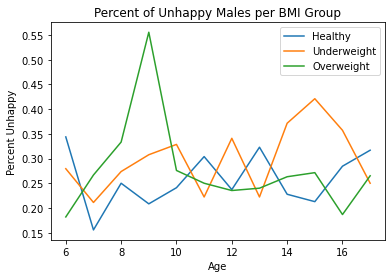

In [185]:
plt.plot(healthy_male)
plt.plot(underweight_male)
plt.plot(overweight_male)
plt.legend(['Healthy', 'Underweight', 'Overweight'])
plt.xlabel('Age')
plt.ylabel('Percent Unhappy')
plt.title('Percent of Unhappy Males per BMI Group')
plt.savefig('figs/female_bmi_age_groups');

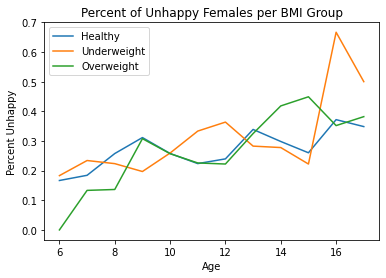

In [186]:
plt.plot(healthy_female)
plt.plot(underweight_female)
plt.plot(overweight_female)
plt.legend(['Healthy', 'Underweight', 'Overweight'])
plt.xlabel('Age')
plt.ylabel('Percent Unhappy')
plt.title('Percent of Unhappy Females per BMI Group')
plt.savefig('figs/male_bmi_age_groups');

## Special Health Care Needs EDA  

In [169]:
special_needs = ['CHPMED42', 'CHSERV42', 'CHLIMI42', 'CHTHER42', 'CHCOUN42', 'CSHCN42']

In [170]:
ans_no = []
for i in special_needs:
    ans_no.append(df.groupby(i)['UNHAP42'].mean().sort_index(ascending=False)[2])

ans_yes = []
for i in special_needs:
    ans_yes.append(df.groupby(i)['UNHAP42'].mean().sort_index(ascending=False)[1])

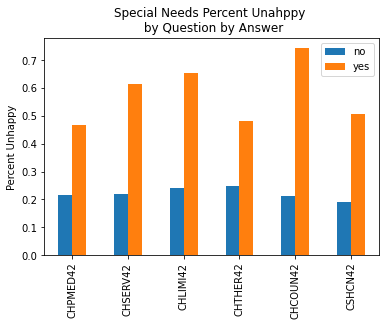

In [187]:
special_needs_df = pd.DataFrame([ans_no, ans_yes, [x for x in special_needs]]).T
special_needs_df.columns = ['no', 'yes', 'question']
special_needs_df.plot(x='question', y=['no', 'yes'], kind='bar', ylabel='Percent Unhappy', xlabel='', 
                      title='Special Needs Percent Unahppy \n by Question by Answer')
plt.savefig('figs/special_needs');

  CHPMED42: Child needs or uses prescribed medicines.                                           CHSERV42: Child needs or uses more medical care, mental health, or education
services than is usual for most children of the same age.
CHLIMI42: Child is limited or prevented in any way in ability to do the things most
children of the same age can do.
CHTHER42: Child needs or gets special therapy such as physical, occupational, or
speech therapy
CHCOUN42: Child has an emotional, developmental, or behavioral problem for which
he or she needs or gets treatment or counseling
CSHCN42: Identifies children with special health care needs

In [2]:
# imports the data
df = pd.read_feather('../data/h201.feather')
health_vars = pd.read_csv('../data/Health Status Variables.csv')

In [3]:
def eda_clean_df(df):
    df = df[(df['AGELAST']>=5) & (df['AGELAST']<=17)]
    df = df[(df['UNHAP42']>=0) & (df['UNHAP42']<=4)]
    df['UNHAP42'] = df['UNHAP42'].map({0:0, 1:1, 2:1, 3:1, 4:1})
    df['RACEV2X'] = df['RACEV2X'].replace({5:4, 6:4, 10:4, 12:5})
    return df

In [4]:
child_df = eda_clean_df(df)
child_df.shape

(5920, 1564)

In [5]:
child_df['RACEV2X'].value_counts()

1.0    4033
2.0    1095
5.0     392
4.0     364
3.0      36
Name: RACEV2X, dtype: int64

In [6]:
# children with special health care needs screener variables
special_needs = list(health_vars['VARIABLE'][30:45])

# columbia impairment scale
impairment = list(health_vars['VARIABLE'][45:58])

# Consumer Assessment of Healthcare Providers and Systems (CAHPS)
cahps = list(health_vars['VARIABLE'][58:72])

# all children variables 
all_child = list(health_vars['VARIABLE'][30:97])

#####
# other physical variables 
other = ['ADHDADDX']

# other identifier/demographic variables 
demo = ['AGELAST', 'SEX', 'RACEV2X', 'FAMINC17']

#### Children with Special Health Care Needs Variables 

In [7]:
# Creates a list of features from the Children with special health care needs variables
features = special_needs + other + demo

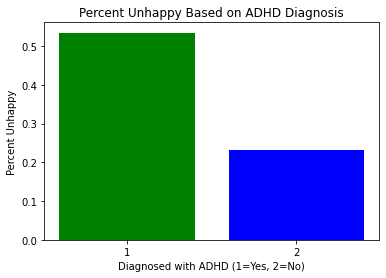

In [8]:
# Shows percent unhappy based on ADHD Diagnosis
add_df = child_df[child_df['ADHDADDX'] > 0]
plt.bar(add_df.groupby('ADHDADDX')['UNHAP42'].mean().index, 
        add_df.groupby('ADHDADDX')['UNHAP42'].mean(),
        color =['green','blue'])
plt.xticks(ticks=add_df.groupby('ADHDADDX')['UNHAP42'].mean().index)
plt.ylabel("Percent Unhappy")
plt.xlabel("Diagnosed with ADHD (1=Yes, 2=No)")
plt.title('Percent Unhappy Based on ADHD Diagnosis');

In [ ]:
import seaborn as sns

In [84]:
# read in data
df = pd.read_feather('../data/h201.feather')

In [85]:
# read in list of variables
var_df = pd.read_csv('../data/Health Status Variables.csv')

In [86]:
# create filter for happiness variable
# filter to only 1-4
hap_filter =(df['UNHAP42'] == 0) | (df['UNHAP42'] == 1) | (df['UNHAP42'] == 2) | (df['UNHAP42'] == 3) | (df['UNHAP42'] == 4)
# set df equal to df with filter
df = df[hap_filter]
# create classes for happiness filter
df['UNHAP42'] = df['UNHAP42'].map({0:0, 1:1, 2:1, 3:1, 4:1})

In [87]:
# group by to get mean of expenses for happinees
df.groupby('UNHAP42')['TOTEXP17'].mean()

UNHAP42
0    1351.435592
1    3187.281638
Name: TOTEXP17, dtype: float64

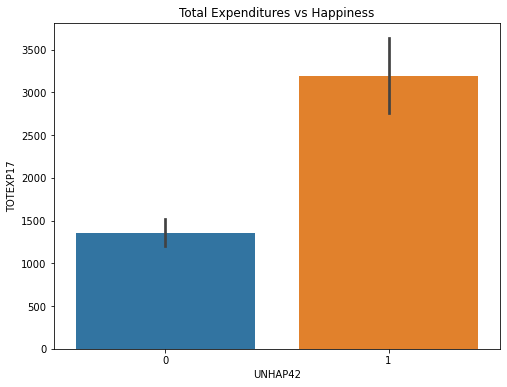

In [88]:
# plot to show visual of above groupby
plt.figure(figsize=(8,6))
sns.barplot(data=df, x='UNHAP42', y='TOTEXP17')
plt.title('Total Expenditures vs Happiness');

## Annotation:
The graph above shows the mean medical expenditures all observations and groups them by their answer to question UNHAP42.  The graph shows that the average medical expenditure for those who answered as being happy is significantly less than those who answered to be unhappy.  In fact the difference between the two is 1,835.84, so children who answered to be unhappy have, on average, 1,835.84 more in medical expenses than those who answered to be happy.

### Graphing child preventive care variables.

In [89]:
# create list of variables from 317 to 331 from the var_df
doc_list = [col for col in var_df['VARIABLE'][316:332] if 'WHN' not in col]

In [90]:
# add unhap42 to the list created aboove
doc_list.append('UNHAP42')

In [91]:
# output list
doc_list

['DENTAL42',
 'EATHLT42',
 'PHYSCL42',
 'SAFEST42',
 'BOOST42',
 'LAPBLT42',
 'HELMET42',
 'NOSMOK42',
 'UNHAP42']

In [92]:
# remove items from list that do not need to be graphed
doc_list.remove('SAFEST42')
doc_list.remove('BOOST42')
doc_list.remove('LAPBLT42')
doc_list.remove('HELMET42')

In [114]:
# define function for plotting varibales in list
def graph(df, col):
    df = df.loc[(df[col]==1) | (df[col]==2), :]
    sns.lineplot(data=df, y='UNHAP42', x=col, legend='brief')
    plt.xticks([1,2])
    plt.ylim(.23,.29)
    plt.title(f'{col} vs UNHAP42');
    pass

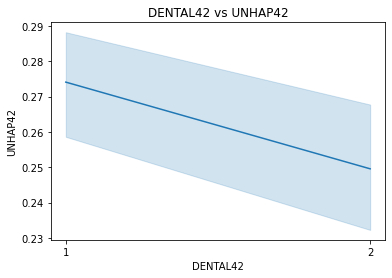

In [106]:
graph(df, doc_list[0])

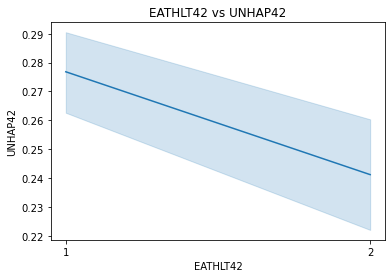

In [107]:
graph(df, doc_list[1])

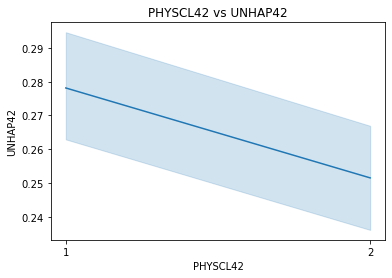

In [108]:
graph(df, doc_list[2])

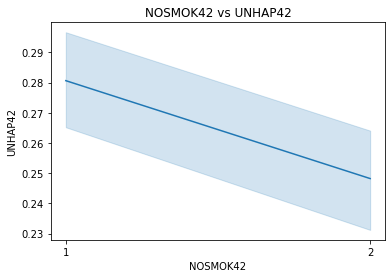

In [109]:
graph(df, doc_list[3])

## Annotation:
The four graphs above all show similar trends.  All graphs show that if the doctor advised about the variable on the x-axis, this value would be a 1, the mean value for UNHAP42 is higher, which would indicate more children that answered to be unhappy. For example, the last graph shows NOSMOK42, which is a 1 if the doctor advised about smoking in the house and a 2 if the docter did not.  The plot above shows a higher UNHAP42 mean when the anwser to NOSMOK42 is 1, in conclusion child who live in a household were someone is smoking in that household they are more likely to be unhappy.